In [92]:
import sys
import pandas as pd
import numpy as np
import csv
import requests
from bs4 import BeautifulSoup
import json
import statsmodels.api as sm
from scipy import stats
import time 
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


def static_function(path_to_static_data):
    #static mode
    #add the functions/code you need to open and print the static copies of your data
    #you can use the path provided in the command line argument to open the data
    f = open(path_to_static_data,"r")
    print(f.read())


The correlation coefficient for traffic collisions and house prices is 0.16902478717195035
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                    0.2353
Date:                Tue, 10 May 2022   Prob (F-statistic):              0.641
Time:                        21:01:20   Log-Likelihood:                -75.440
No. Observations:                  10   AIC:                             154.9
Df Residuals:                       8   BIC:                             155.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/Users/mingcanli/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


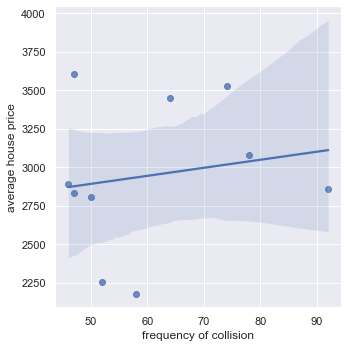

In [98]:
    #analysis part
a = open('zipcode.csv',"r")
csvreader = csv.reader(a)
zipcode_list = []
for x in csvreader:
        zipcode_list.append(x[0])
        c = Counter(zipcode_list)
        top_10_zip = c.most_common(10)
#print(top_10_zip)
b = open('avg_price.csv',"r")
reader2 = csv.reader(b)
#print(b.read())
dict_avg = []
for row in reader2:
        dict_avg.append(float(row[1]))
#print(dict_avg)
frequency_accident = []
for value in top_10_zip:
        frequency_accident.append(int(value[1]))
#print(frequency_accident)
correlation, p_value = stats.pearsonr(frequency_accident, dict_avg)
print("The correlation coefficient for traffic collisions and house prices is " + str(correlation))
Y = dict_avg 
X = frequency_accident
X = sm.add_constant(X)
est=sm.OLS(Y, X)
est = est.fit()
print(est.summary())
new_dataset = open("new.csv", "w")
final = [("frequency of collision","average house price")]
for x in range(len(dict_avg)):
        final.append((frequency_accident[x],dict_avg[x]))
#print(final)
for n in final:
        for y in n:
            new_dataset.write(str(y)+',')
        new_dataset.write('\n')
new_dataset.close()
#z = open("new.csv", "r")
#print(z.read())
con = pd.read_csv('new.csv')
#print(con)
con.rename(columns={'frequency of collision':'frequency of collision','average house price':'average house price','Unnamed: 2':'N/A'}, inplace=True)
#print(con.head())


#print(sns.scatterplot(x="frequency of collision", y="average house price", data=con))
print(sns.lmplot(x="frequency of collision", y="average house price", data=con))